### Regular lab Question – 6

Lab Assignment: Time-Series Prediction with RNN

1. Data Preprocessing:
- Load the dataset and focus on the 'Close' price column, as this will be your target variable for prediction.
- Normalize the data (e.g., using Min-Max scaling to keep values between 0 and 1).
- Split the dataset into a training set (80%) and a testing set (20%).

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('HistoricalQuotes.csv')

df['Date'] = pd.to_datetime(df['Date'])
df['Close'] = df['Close'].str.replace('$', '').astype('float')
df['Open'] = df['Open'].str.replace('$', '').astype('float')
df['High'] = df['High'].str.replace('$', '').astype('float')
df['Low'] = df['Low'].str.replace('$', '').astype('float')

# Extract the 'Close' price column
data = df['Close'].values.reshape(-1, 1)

In [ ]:
# Normalize the data using Min-Max scaling
scaler = MinMaxScaler(feature_range=(0, 1))
data_normalized = scaler.fit_transform(data)

In [ ]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets (80% training, 20% testing)
train_data, test_data = train_test_split(data_normalized, test_size=0.2, shuffle=False)

2. Create Training Sequences:
- Convert the 'Close' prices into a series of sequences for training.
- Define a sequence length (e.g., 60 days), where each sequence will be
used to predict the stock price for the next day.

In [ ]:
import numpy as np

# Define the sequence length
sequence_length = 60

# Create empty lists for sequences and corresponding labels
X_train = []
y_train = []

# Loop through the training data to create sequences and labels
for i in range(sequence_length, len(train_data)):
    # Extract the sequence of 'sequence_length' days
    X_train.append(train_data[i-sequence_length:i])
    # The label is the price on the next day
    y_train.append(train_data[i])

# Convert lists to numpy arrays for compatibility with RNN input
X_train, y_train = np.array(X_train), np.array(y_train)

print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)

Shape of X_train: (1954, 60, 1)
Shape of y_train: (1954, 1)


3. Build the RNN Model:
- Define an RNN model with the following architecture:
 - An RNN layer with 50 units
 - A Dense layer with 1 unit (for regression output)
- Use the mean squared error (MSE) loss function and the Adam optimizer.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from tensorflow.keras.optimizers import Adam

# Define the RNN model
model = Sequential()

# Add an RNN layer with 50 units
model.add(SimpleRNN(units=50, input_shape=(X_train.shape[1], 1)))

# Add a Dense layer with 1 unit for regression output
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer=Adam(), loss='mean_squared_error')

# Print model summary
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)               │ (None, 50)                  │           2,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,651 (10.36 KB)

 Trainable params: 2,651 (10.36 KB)

 Non-trainable params: 0 (0.00 B)

4. Train the Model:
- Train the model on the training set for 50 epochs with a batch size of 32.

- Use validation data to check for overfitting.

In [ ]:
# Create test sequences for validation in the same way as training data
X_test = []
y_test = []

for i in range(sequence_length, len(test_data)):
    X_test.append(test_data[i-sequence_length:i])
    y_test.append(test_data[i])

# Convert lists to numpy arrays
X_test, y_test = np.array(X_test), np.array(y_test)

In [ ]:
# Train the model
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_data=(X_test, y_test)
)

Epoch 1/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 4s 28ms/step - loss: 0.0305 - val_loss: 2.5155e-04
Epoch 2/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 4.9174e-04 - val_loss: 3.4352e-04
Epoch 3/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 3.4428e-04 - val_loss: 1.3988e-04
Epoch 4/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 3.0860e-04 - val_loss: 7.9787e-05
Epoch 5/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.6110e-04 - val_loss: 6.6278e-05
Epoch 6/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 2.8410e-04 - val_loss: 1.1169e-04
Epoch 7/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 2.2301e-04 - val_loss: 1.5070e-04
Epoch 8/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 2.3955e-04 - val_loss: 1.4786e-04
Epoch 9/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 1.9810e-04 - val_loss: 7.6210e-05
Epoch 10/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 3.1890e-04 - val_loss: 1.0684e-04
Epoch 11/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.6655e-04 - val_loss

5. Make Predictions:
- Predict the stock prices on the test set and transform the results back to
the original scale if normalization was applied.
- Plot the predicted vs. actual stock prices to visualize the model’s
performance.

In [ ]:
# Predict the stock prices on the test set
predictions = model.predict(X_test)

# Inverse transform the predicted values and actual values to original scale
predictions = scaler.inverse_transform(predictions)
y_test_actual = scaler.inverse_transform(y_test)

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step


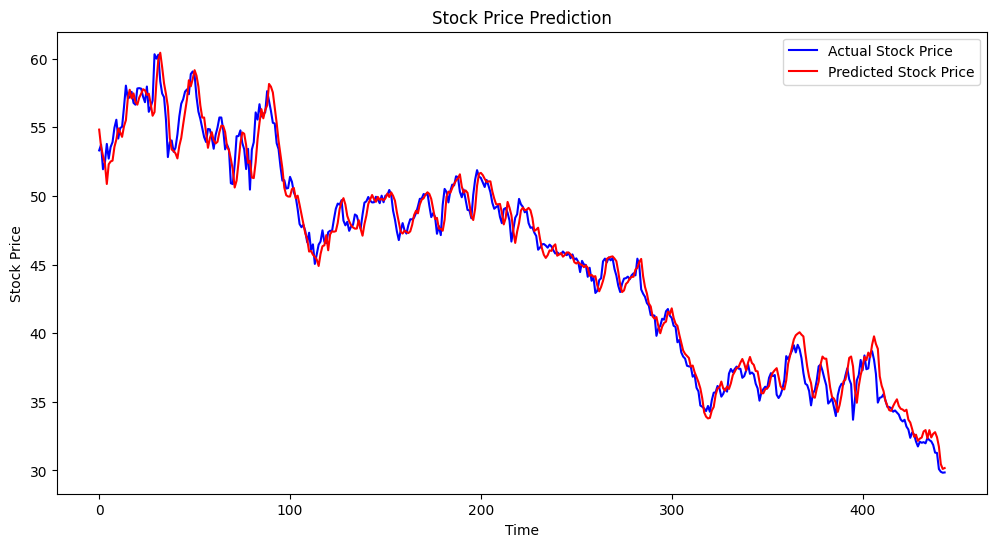

In [ ]:
# Plot the actual vs. predicted prices
plt.figure(figsize=(12, 6))
plt.plot(y_test_actual, color='blue', label='Actual Stock Price')
plt.plot(predictions, color='red', label='Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

6. Evaluation:
- Calculate the mean absolute error (MAE) and root mean squared error
(RMSE) on the test set.
- Discuss how well the model performed based on these metrics.

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Calculate MAE and RMSE
mae = mean_absolute_error(y_test_actual, predictions)
rmse = np.sqrt(mean_squared_error(y_test_actual, predictions))

print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)

Mean Absolute Error (MAE): 0.7836620821291262
Root Mean Squared Error (RMSE): 1.0391198972434257


- Mean Absolute Error (MAE): The MAE of 0.78 indicates that, on average, the model's predictions deviate from the actual values by around 0.78 units. This is a relatively low error, especially considering the stock price range shown on the plot (around 30 to 60). This means the model is generally quite accurate, making only small errors.

- Root Mean Squared Error (RMSE): The RMSE of 1.04 suggests that the model has a low level of error overall. RMSE is more sensitive to larger errors, so the fact that this value is close to the MAE implies that there are no large outliers or significant prediction mistakes. Most predictions stay consistently close to the actual values.

- Given that stock prices fluctuate within a range of about 30 to 60 in this dataset, an MAE of 0.78 and RMSE of 1.04 are quite low relative to the data range. This means the model provides reliable predictions with minimal deviation from actual values.

### Model Report

 This report evaluates the performance of a stock price prediction model based on its ability to capture trends, respond to short-term fluctuations, and minimize prediction errors.

* Visual Analysis

 The prediction model shows a strong alignment with actual stock prices over time. The predicted prices closely follow the actual stock price movements, demonstrating the model’s effectiveness in capturing both upward and downward trends. The model does not only follow the overall direction but also captures minor fluctuations in stock prices, indicating that it can account for short-term volatility. This feature is crucial for stock price prediction, where market prices can fluctuate significantly over brief periods.

* Error Metrics

  - The model's accuracy is further validated by two error metrics: Mean Absolute Error (MAE) and Root Mean Squared Error (RMSE). With an MAE of 0.78, the model’s predictions deviate, on average, by less than one unit of stock price from the actual values. This low MAE suggests that the model is consistently making small errors, which is particularly impressive given the stock price range of roughly 30 to 60.

  - The RMSE of 1.04 reinforces this finding. Since RMSE penalizes larger errors more heavily, a low RMSE value indicates that there are no significant prediction outliers. The small difference between MAE and RMSE also suggests that the errors are evenly distributed without large deviations, implying steady and reliable performance across the entire dataset.

* Conclusion

 In conclusion, both visual analysis and error metrics confirm that this stock price prediction model is effective at capturing general trends and short-term movements in stock prices. The low MAE and RMSE values reflect high prediction accuracy and a minimal deviation from actual values. This makes the model a reliable tool for stock price forecasting. While there may be room for further refinement to reduce small residual errors, the model demonstrates strong predictive capabilities that align well with actual market behavior, making it a valuable asset for short-term forecasting.